<h1>Yoda Retirer Dashboard</h1>

<p>Risk-averse investors can structure portfolios to optimize or maximize expected return based on a given level of market risk, emphasizing that risk is an inherent part of higher reward. It is one of the most important and influential economic theories dealing with finance and investment, hypoteshis put forth by Harry Markowitz in "Portfolio Selection"(published in 1952 by the Journal of Finance).</p>


In [1]:
# initial imports
import os
import pandas as pd
import numpy as np
from datetime import datetime, timedelta
import matplotlib.pyplot as plt
%matplotlib inline
#from datetime import datetime, timedelta
import hvplot.pandas
import panel as pn
import plotly.express as px
import seaborn as sns

import yoda_simulator as ys

# Initialize the Panel Extensions (for Plotly)
pn.extension('plotly')

<h1>Portfolio optimization process</h1>

<pre><code>1. defining portfolios
2. cleaning data
3. efficient frontier weight analysis
4......
5......
</code></pre>

# Import Data

In [2]:
# Import the portflios to Pandas DataFrames
portfolio1 = pd.read_csv('./all_data_pull/Yoda 1 - The World is Your Oyster.csv').set_index('Unnamed: 0')
portfolio2 = pd.read_csv('./all_data_pull/Yoda 2 - Play It Again Sam.csv').set_index('Unnamed: 0')
portfolio3 = pd.read_csv('./all_data_pull/Yoda 3 - Bond James Bond.csv').set_index('Unnamed: 0')
portfolio4 = pd.read_csv('./all_data_pull/Yoda 4 - Have Your Cake And Eat It Too.csv').set_index('Unnamed: 0')
portfolio5 = pd.read_csv('./all_data_pull/Yoda 5 - Show Me The Money.csv').set_index('Unnamed: 0')
display(portfolio1, portfolio2, portfolio3, portfolio4, portfolio5)

VOOV       EZU       IWM       SMH       IBB  \
Unnamed: 0                                                             
Daily Mean Returns  0.000293  0.000125  0.000300  0.000857  0.000218   
Standard Deviation  0.008173  0.010617  0.010226  0.014656  0.015205   
Weights             0.833000  0.833000  0.833000  0.833000  0.833000   

                         XLU      VOOG       SPY       QQQ       BKF  \
Unnamed: 0                                                             
Daily Mean Returns  0.000359  0.000510  0.000405  0.000673  0.000237   
Standard Deviation  0.008761  0.009015  0.008456  0.010814  0.012705   
Weights             0.833000  0.833000  0.833000  0.833000  0.833000   

                         EEM       AIA  
Unnamed: 0                              
Daily Mean Returns  0.000131  0.000294  
Standard Deviation  0.011901  0.011704  
Weights             0.833000  0.833000

TLT
Unnamed: 0                  
Daily Mean Returns  0.000116
Standard Deviation  0.007575
Weights             1.000000

AGG       TLT       SHY       IEI       HYG  \
Unnamed: 0                                                             
Mean Daily Returns  0.000026  0.000116  0.000002  0.000028 -0.000020   
Standard Deviation  0.002021  0.007575  0.000670  0.001871  0.003806   
Weights             0.143000  0.143000  0.143000  0.143000  0.143000   

                        BKLN       LQD  
Unnamed: 0                              
Mean Daily Returns -0.000049  0.000064  
Standard Deviation  0.002091  0.003117  
Weights             0.143000  0.143000

SMH       XLU       QQQ       TLT
Unnamed: 0                                                
Mean Daily Returns  0.000857  0.000359  0.000673  0.000116
Standard Deviation  0.014656  0.008761  0.010814  0.007575
Weights             0.228760  0.200550  0.310590  0.260100

SMH       XLU       QQQ
Unnamed: 0                                      
Mean Daily Returns  0.000857  0.000359  0.000673
Standard Deviation  0.014656  0.008761  0.010814
Weights             0.289930  0.364650  0.345420

<h1>All Optimal Portfolios</h1>

<p>In this section, you will copy the code for each plot type from your analysis notebook and place it into separate functions that Panel can use to create panes for the dashboard. </p>

<p>These functions will convert the plot object to a Panel pane.</p>

<p>Be sure to include any DataFrame transformation/manipulation code required along with the plotting code.</p>

<p>Return a Panel pane object from each function that can be used to build the dashboard.</p>

<p>Note: Remove any <code>.show()</code> lines from the code. We want to return the plots instead of showing them. The Panel dashboard will then display the plots.</p>


In [25]:
#use interactive widgets for insert user data, which should be presented on the welcome tab, 
#and add click buton to call the functions for all portfolio.
#to make it easier

from ipywidgets import Layout, Button, Box, FloatText, Textarea, Dropdown, Label, IntSlider
from ipywidgets import widgets
import yoda_simulator as ys
from IPython.display import display


#this widgets should be put in function at the end, 

slider = widgets.IntSlider(value= 5, min=5, max=30)
#years_until_retirement = slider.value

dropdown = widgets.Dropdown(options=['Yoda 1 - The World is Your Oyster',
                           'Yoda 2 - Play It Again Sam',
                           'Yoda 3 - Bond James Bond',
                           'Yoda 4 - Have Your Cake And Eat It Too', 
                           'Yoda 5 - Show Me The Money'])
#portfolio_choice = dropdown.value

investment = widgets.FloatText()

withdrawal_type = widgets.Dropdown(options=['fixed amount', 'fixed rate'])

withdrawal_number = widgets.FloatText()
#with withdraw_type = rate, it is like 0.05, if withdraw type = amount, should input $$$ amount.

investment_target = widgets.FloatText()

button = widgets.Button(description="Calculate!")
output = widgets.Output()

#here we are gonna need a function to get the output correctly. CHALLENGE!!!
def on_button_clicked(b):
    with output:
        print(years_to_retirement, portfolio_choice, initial_investment,
              withdraw_number, withdraw_type, investment_goal)
        
        
button.on_click(on_button_clicked)

form_item_layout = Layout(
    display='flex',
    flex_flow='row',
    justify_content='space-between'
)

form_items = [
    Box([Label(value='Years Until Retirement'), slider], layout=form_item_layout),
    Box([Label(value='Yoda Portfolio Choice'),dropdown], layout=form_item_layout),
    Box([Label(value='Initial Investment'), investment], layout=form_item_layout),
    Box([Label(value='Withdrawal Type'), withdrawal_type], layout=form_item_layout),
    Box([Label(value='Withdrawal Amount/Rate'), withdrawal_number], layout=form_item_layout),
    Box([Label(value='Investment Goal'), investment_target], layout=form_item_layout),
    Box([Label(value='Additional Information'), widgets.Textarea()], layout=form_item_layout),
    Box([Label(value='YODA Calculator'), button], layout=form_item_layout)
    
]

widgets.interact_manual()

insert_param = Box(form_items, layout=Layout(
    display='flex',
    flex_flow='column',
    border='solid 2px',
    align_items='stretch',
    width='50%'
))
insert_param

Box(children=(Box(children=(Label(value='Years Until Retirement'), IntSlider(value=5, max=30, min=5)), layout=…

In [50]:
years_to_retirement = slider.value
portfolio_choice = dropdown.value
initial_investment = investment.value 
withdraw_number = withdrawal_number.value
withdraw_type = withdrawal_type.value
investment_goal = investment_target.value
#display should be take out from final dashboard, not to ruin it visually
display(years_to_retirement, portfolio_choice, 
        initial_investment, withdraw_type,
        withdraw_number, investment_goal)

19

'Yoda 2 - Play It Again Sam'

100.0

'fixed amount'

5.0

250.0

In [51]:
if portfolio_choice == 'Yoda 1 - The World is Your Oyster':
    portfolio = portfolio1
if portfolio_choice == 'Yoda 2 - Play It Again Sam':
    portfolio = portfolio2
if portfolio_choice == 'Yoda 3 - Bond James Bond':
    portfolio = portfolio3
if portfolio_choice == 'Yoda 4 - Have Your Cake And Eat It Too':
    portfolio = portfolio4
if portfolio_choice == 'Yoda 5 - Show Me The Money':
    portfolio = portfolio5

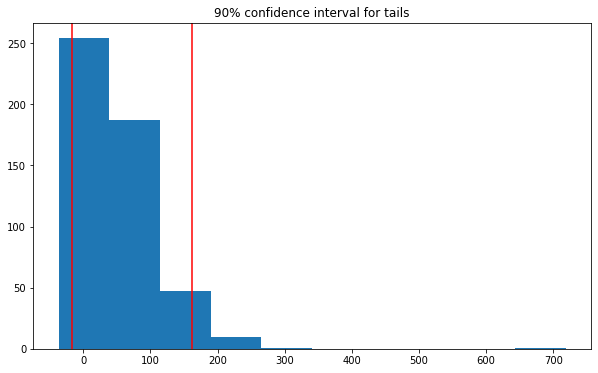

In [52]:
#should be deleted from here, just present into the panel dashboard

ys.confidence_interval(portfolio, initial_investment, withdraw_type, withdraw_number, years_to_retirement)

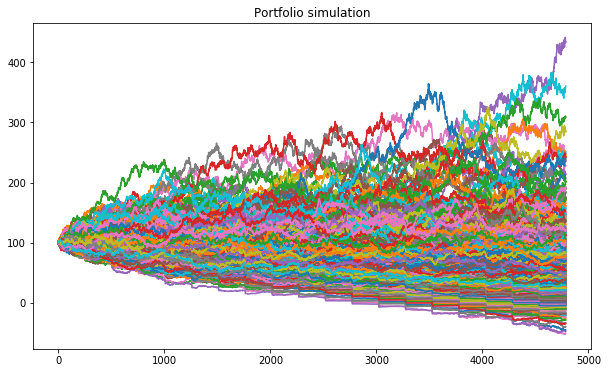

In [53]:
#should be deleted from here, just present into the panel dashboard

ys.simulation_chart(portfolio, initial_investment, withdraw_type, withdraw_number, years_to_retirement)

CPU times: user 552 ms, sys: 239 ms, total: 791 ms
Wall time: 869 ms


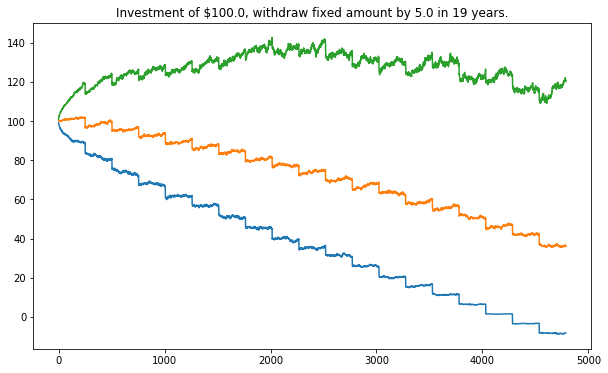

In [54]:
%%time

#should be deleted from here, just present into the panel dashboard
ys.quantile_chart(portfolio, initial_investment, withdraw_type, withdraw_number, years_to_retirement)

In [55]:
%%time
#should be deleted from here, just present into the panel dashboard
result_by_amount = ys.search_withdraw_amount(portfolio, initial_investment, years_to_retirement,investment_goal)

CPU times: user 20.6 s, sys: 9.43 s, total: 30 s
Wall time: 32.6 s


In [56]:
result_by_amount['a']

'Rather than withdrawing, you should deposit $12 annually, and ending 10% percentile balance after 19 years would be $281.'

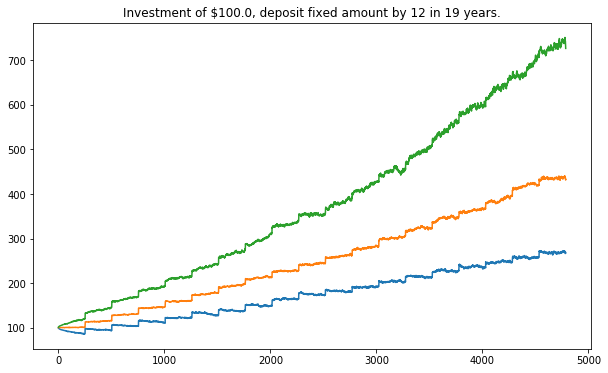

In [57]:
ys.quantile_chart(portfolio, initial_investment, withdraw_type, result_by_amount['b'], years_to_retirement)

In [58]:
%%time
#should be deleted from here, just present into the panel dashboard

result_by_rate = ys.search_withdraw_rate(portfolio, initial_investment, years_to_retirement,investment_goal)

CPU times: user 42.5 s, sys: 19.7 s, total: 1min 2s
Wall time: 1min 8s


In [59]:
result_by_rate['a']

'Rather than withdrawing, you should deposit 7.000000000000001% annually, and ending 10% percentile balance after 19 years would be $254.'

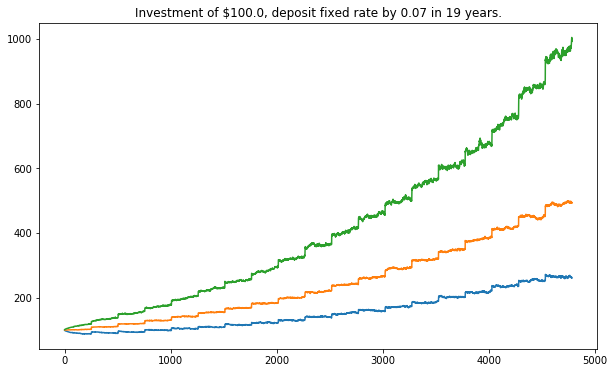

In [60]:
ys.quantile_chart(portfolio, initial_investment, 'fixed rate', result_by_rate['b'], years_to_retirement)

- - -

## Panel Dashboard

In this section, you will combine all of the plots into a single dashboard view using Panel. Be creative with your dashboard design!

In [61]:
%%time
import yoda_simulator as ys

# Create a Title for the Dashboard
title = pn.pane.Markdown(
    """
# Yoda Retirer - retirement simulation tool,,,,,,
""",
    width=800,
)

welcome = pn.pane.Markdown(
    """
This dashboard presents a visual analysis of retirement simulation based on user risk preferences.
"""
)

# Create a tab layout for the dashboard
tabs = pn.Tabs(
    ('Welcome', pn.Row(welcome)),
    (portfolio_choice + ' Simulation', 
         pn.Column(ys.simulation_chart(portfolio, initial_investment, withdraw_type, withdraw_number, years_to_retirement))),
    (portfolio_choice + ' Confidence Interval', 
         pn.Column(ys.confidence_interval(portfolio, initial_investment, withdraw_type, withdraw_number, years_to_retirement))),
    (portfolio_choice + ' Quantile Chart', 
         pn.Column(ys.quantile_chart(portfolio, initial_investment, withdraw_type, withdraw_number, years_to_retirement)))
)
    
    
    
    

panel = pn.Column(pn.Row(title), tabs, width=900)
   
    

CPU times: user 1.73 s, sys: 703 ms, total: 2.43 s
Wall time: 2.79 s


## Serve the Panel Dashboard

Matplotlib(Figure)
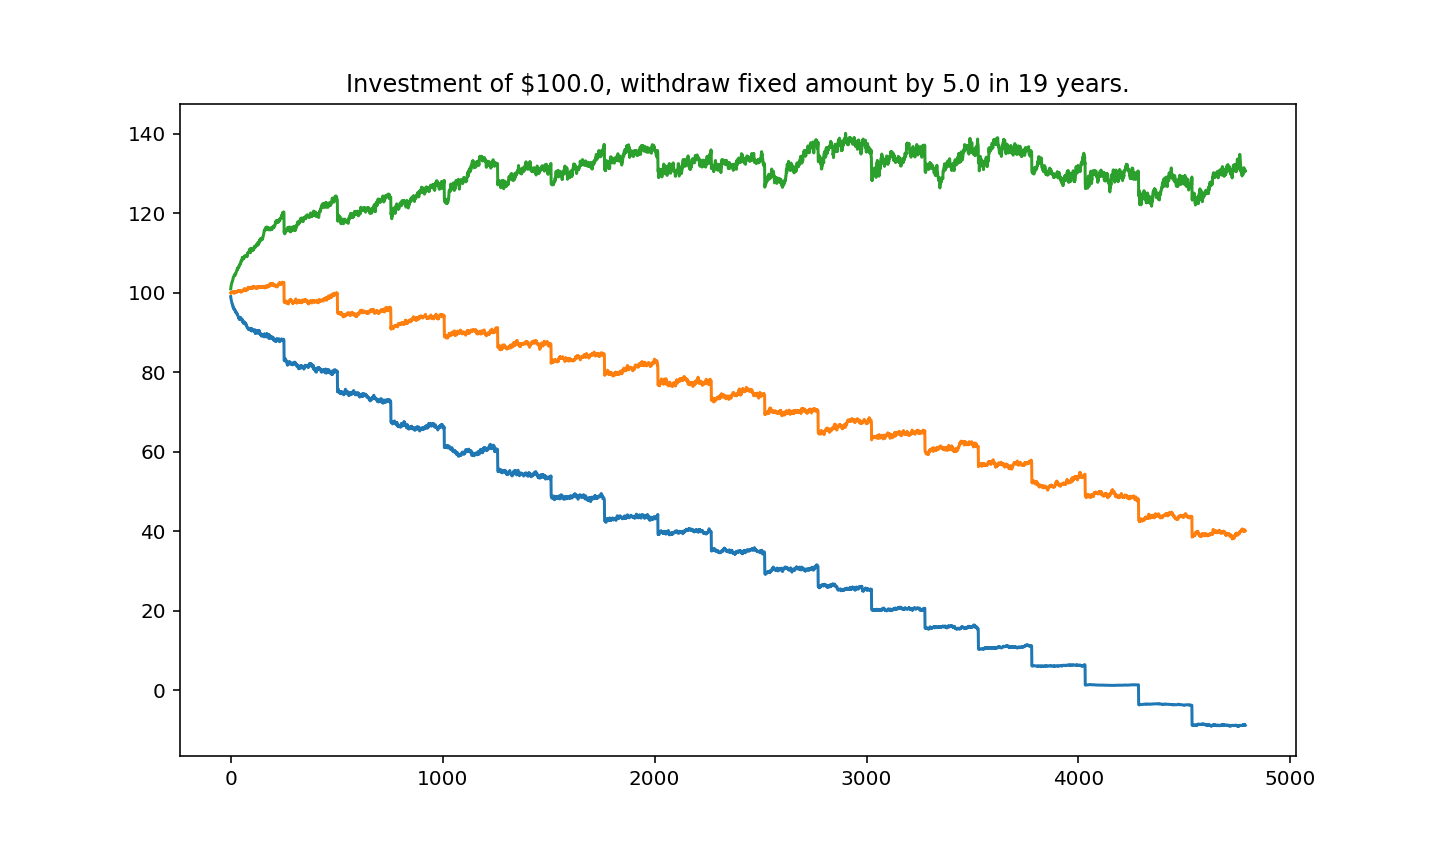

In [62]:
panel = pn.pane.Matplotlib(ys.quantile_chart(portfolio, initial_investment, withdraw_type, withdraw_number, years_to_retirement))
panel.servable()

Matplotlib(Figure)
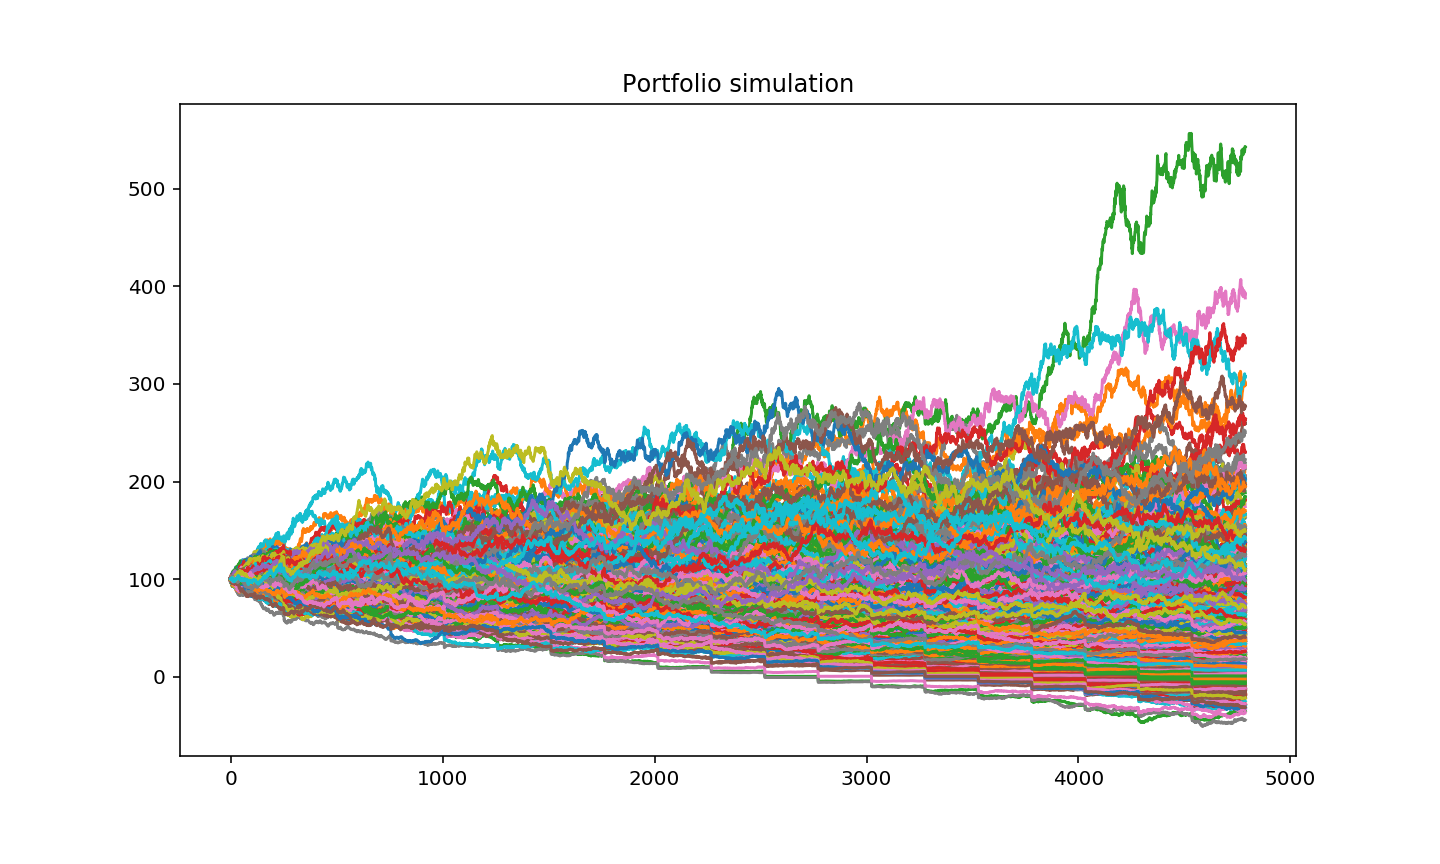

In [63]:
panel = pn.pane.Matplotlib(ys.simulation_chart(portfolio, initial_investment, withdraw_type, withdraw_number, years_to_retirement))
panel.servable()

Matplotlib(Figure)
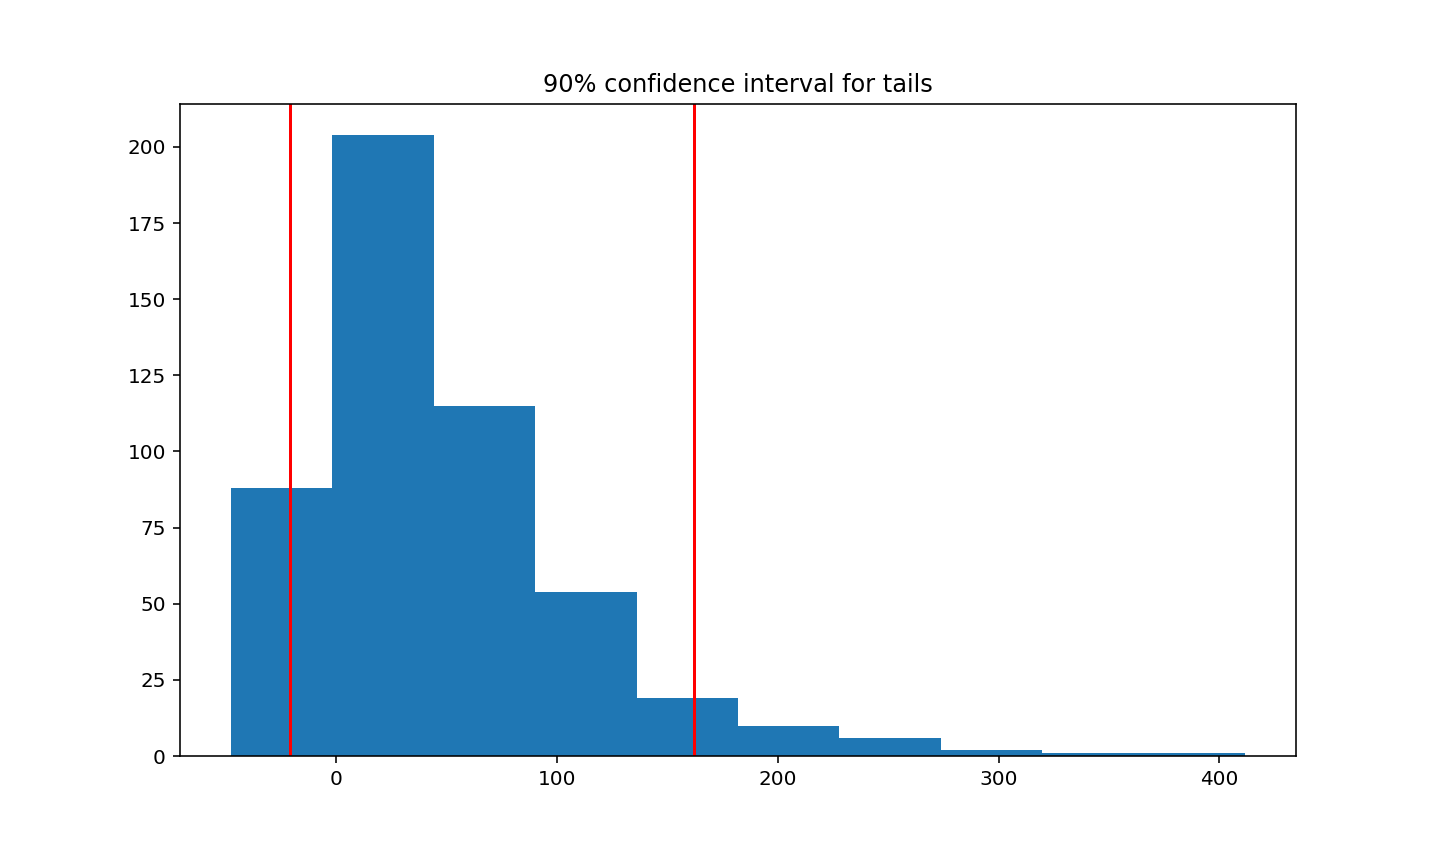

In [64]:
panel = pn.pane.Matplotlib(ys.confidence_interval(portfolio, initial_investment, withdraw_type, withdraw_number, years_to_retirement))
panel.servable()